In [3]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 


In [4]:
(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 6s 1us/step


In [5]:
len(xtrain)

60000

In [6]:
len(xtest)

10000

In [13]:
xtrain.shape

(60000, 28, 28)

In [21]:
xtrain = xtrain/255
xtest = xtest/255

In [22]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

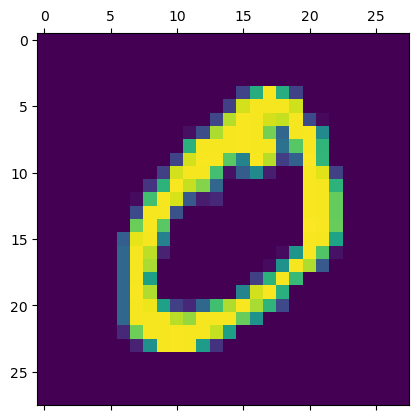

In [23]:
plt.matshow(xtrain[1])

In [24]:
ytrain[1]

0

In [25]:
new_xtrain = xtrain.reshape(len(xtrain),28*28)
new_xtest = xtest.reshape(len(xtest),28*28)

In [26]:
new_xtrain.shape

(60000, 784)

In [31]:
new_xtrain[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(new_xtrain, ytrain, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4675 - accuracy: 0.8773
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3028 - accuracy: 0.9155
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2824 - accuracy: 0.9222
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.9238
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2658 - accuracy: 0.9261
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2618 - accuracy: 0.9271
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9282
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2557 - accuracy: 0.9293


In [34]:
model.evaluate(new_xtest,ytest)

313/313 [==============================] - 2s 3ms/step - loss: 0.2648 - accuracy: 0.9271


[0.26477423310279846, 0.9271000027656555]

In [74]:
y_predicated = model.predict(new_xtest)
y_predicated[1]

313/313 [==============================] - 1s 2ms/step


array([6.0503542e-01, 1.1472463e-02, 9.9966067e-01, 1.9957468e-01,
       4.6489007e-11, 8.2213271e-01, 8.6151177e-01, 2.0015475e-14,
       1.1579816e-01, 3.8580604e-11], dtype=float32)

In [40]:
np.argmax(y_predicated[0])

7

In [80]:
len(y_predicated)

10000

In [85]:
y_predicted = [np.argmax(i) for i in y_predicated]

In [87]:
y_predicted[:5]

[7, 2, 1, 0, 4]

In [89]:
cm = tf.math.confusion_matrix(ytest,y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1117,    3,    1,    0,    1,    4,    2,    7,    0],
       [   7,   12,  924,   13,    6,    4,   11,   10,   40,    5],
       [   5,    0,   19,  924,    1,   19,    2,   10,   21,    9],
       [   2,    1,    6,    2,  910,    0,    8,    4,   10,   39],
       [  11,    3,    1,   31,    8,  774,   15,   10,   32,    7],
       [  17,    3,    8,    1,    7,   10,  908,    1,    3,    0],
       [   2,    6,   21,    7,    4,    1,    0,  949,    3,   35],
       [  10,   12,    6,   21,    8,   20,   10,   11,  867,    9],
       [  11,    8,    1,    8,   20,    6,    0,   17,    7,  931]])>

Text(95.72222222222221, 0.5, 'Truth')

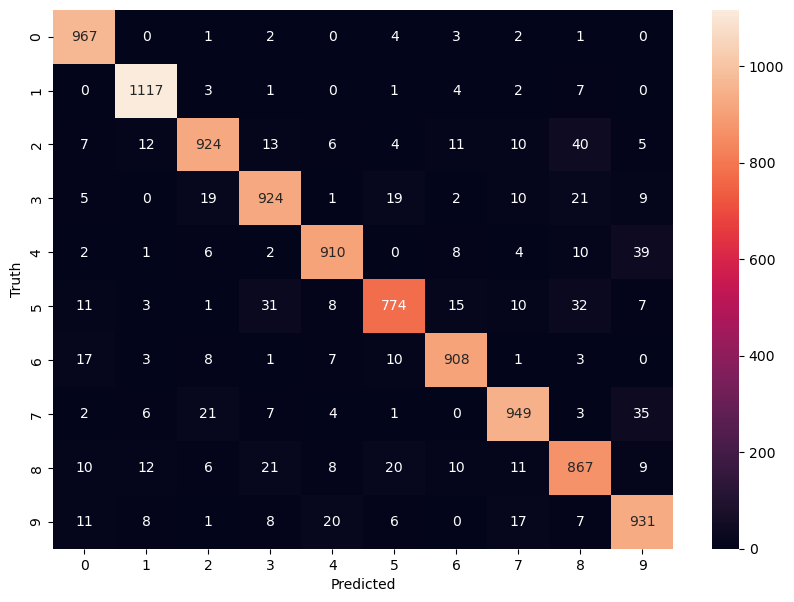

In [95]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer



In [97]:
model = keras.Sequential([
    keras.layers.Dense(150,input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(new_xtrain, ytrain, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2521 - accuracy: 0.9276
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1076 - accuracy: 0.9679
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9774
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0548 - accuracy: 0.9833
Epoch 5/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0406 - accuracy: 0.9875
Epoch 6/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0324 - accuracy: 0.9898
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0252 - accuracy: 0.9922
Epoch 8/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0210 - accuracy: 0.9932


In [99]:
model.evaluate(new_xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9804


[0.06950894743204117, 0.980400025844574]

In [111]:
y_predicted = model.predict(new_xtest)
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted


313/313 [==============================] - 1s 2ms/step


[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 8,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [112]:

cm = tf.math.confusion_matrix(ytest,y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    1,    0,    1,    0,    3,    1,    3,    2],
       [   0, 1125,    3,    0,    0,    0,    1,    2,    4,    0],
       [   2,    0, 1020,    0,    1,    0,    2,    5,    2,    0],
       [   0,    0,    5,  985,    0,    5,    0,    4,    2,    9],
       [   1,    1,    3,    1,  957,    0,    2,    4,    1,   12],
       [   3,    1,    0,    7,    2,  867,    3,    2,    5,    2],
       [   5,    3,    3,    1,    5,    8,  932,    0,    1,    0],
       [   0,    1,    8,    1,    0,    0,    0, 1011,    2,    5],
       [   4,    0,    2,    3,    2,    2,    1,    4,  953,    3],
       [   0,    3,    0,    3,    8,    2,    0,    4,    3,  986]])>

Text(95.72222222222221, 0.5, 'Truth')

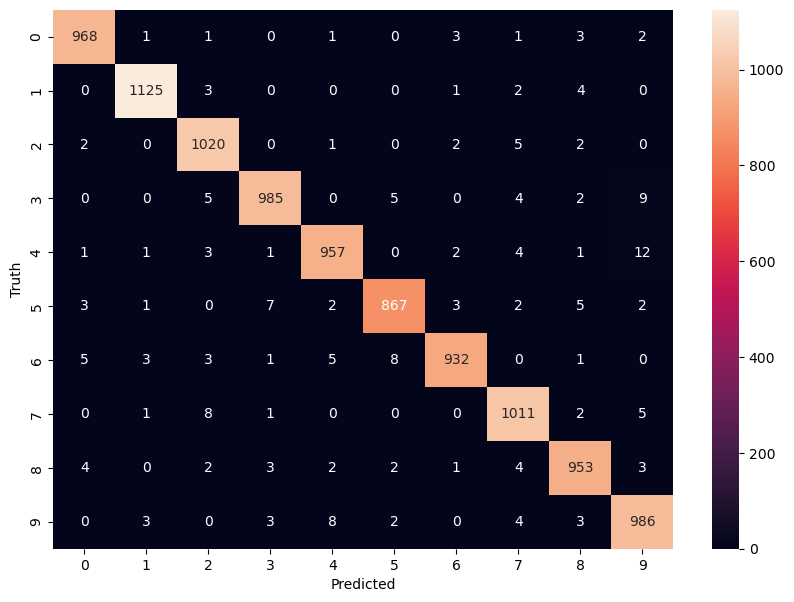

In [113]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')